In [26]:
from utils import desenha, nms, transformer, inv_transformer
from model import custom_model
import torch
import matplotlib.pyplot as plt
from create_dataset import criar_imagem
import random

# Importando modelo

In [9]:
IMG_SIZE = 150
N_GRIDS = 5
CELL_SIZE = int(IMG_SIZE/N_GRIDS)
input = torch.rand((1, 3, CELL_SIZE, CELL_SIZE))

model = custom_model(input, num_classes=3, IMG_SIZE=IMG_SIZE, N_GRIDS=5, transformer_=transformer, inv_transformer_=inv_transformer)
checkpoint = torch.load('checkpoint.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

# Análises

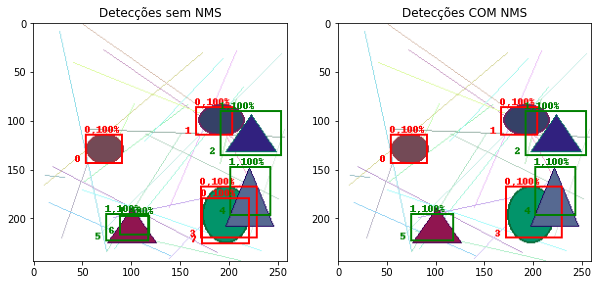

In [42]:
img_pil, _ = criar_imagem('', random.randint(4, 10)) # 7 objetos por imagem
img_pil2 = img_pil.copy()
threshold = .7

detections = model.detect(img_pil, threshold=threshold)
img_pil = desenha(img_pil, detections)
detections2 = nms(detections)
img_pil2 = desenha(img_pil2, detections2)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_pil)
plt.title('Detecções sem NMS')

plt.subplot(1, 2, 2)
plt.imshow(img_pil2)
plt.title('Detecções COM NMS')

plt.show()